In [32]:
import glob 
import json
import numpy as np

from scipy import stats

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

sns.set(style='whitegrid')

In [24]:
test_scores = []
logs = sorted(glob.glob('../logs_folder/*.json'))
for log_name in logs[:100]:
    log = json.load(open(log_name, 'r'))
    test_scores.append(np.mean(log['test_losses']))

/home/filatov/miniconda/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/filatov/miniconda/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
scores = {'zenas': [], 'gradnorm': []}
my_logs = sorted(glob.glob('../logs/*.json'))
for log_name in my_logs[:100]:
    log = json.load(open(log_name, 'r'))
    scores['zenas'].append(log['zenas'])
    scores['gradnorm'].append(log['gradnorm'])

In [26]:
zenas = np.array(scores['zenas'])
gradnorm = np.array(scores['gradnorm'])
test = np.array(test_scores)

In [27]:
zenas_ids = np.where(zenas > 0)[0]
test_ids = np.where(test > 0)[0]

ids = np.intersect1d(zenas_ids, test_ids)

In [28]:
zenas_filtered = zenas[ids]
gradnorm_filtered = gradnorm[ids]
test_filtered = test[ids]

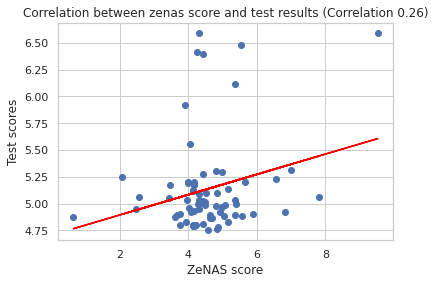

In [64]:
plt.scatter(zenas_filtered, test_filtered)

a1, b1 = np.polyfit(zenas_filtered, test_filtered, 1)
correlation_1 = stats.pearsonr(zenas_filtered, test_filtered)[0]

plt.title(f"Correlation between zenas score and test results (Correlation {round(correlation_1, 2)})")
plt.plot(zenas_filtered, a1*zenas_filtered+b1, color='red')
plt.ylabel("Test scores")
plt.xlabel("ZeNAS score")
plt.savefig("zenas.png", dpi=300)
plt.show()

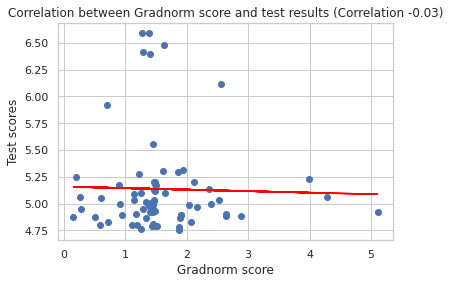

In [65]:
plt.scatter(gradnorm_filtered, test_filtered)
a2, b2 = np.polyfit(gradnorm_filtered, test_filtered, 1)
correlation_2 = stats.pearsonr(gradnorm_filtered, test_filtered)[0]
plt.title(f"Correlation between Gradnorm score and test results (Correlation {round(correlation_2, 2)})")
plt.plot(gradnorm_filtered, a2*gradnorm_filtered+b2, color='red')
plt.ylabel("Test scores")
plt.xlabel("Gradnorm score")
plt.savefig("Gradnorm.png", dpi=300)
plt.show()